Its big chunk of dataset so i am only taking the sub-dataset duration of 5 year(12- 16)

Load the data set

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import seaborn as sns
#df=pd.read_csv('Chicago_Crimes_.csv')
df=pd.read_csv('Chicago_Crimes_.csv')

df.head(2)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"


Checking the data set

In [0]:
df.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [0]:
df.shape

(1456714, 23)

I am removing the un-usable feature those i will not use, so that it will seedup processing of the dataset.

In [0]:
df.drop(['Unnamed: 0','ID','Case Number','Updated On','Latitude','Longitude', 'Location','IUCR'],axis=1,inplace=True)
df.columns

Index(['Date', 'Block', 'Primary Type', 'Description', 'Location Description',
       'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area',
       'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year'],
      dtype='object')

In [0]:
df.dtypes

Date                     object
Block                    object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
dtype: object

Check for the missing value

In [0]:
df.isna().sum()

Date                        0
Block                       0
Primary Type                0
Description                 0
Location Description     1658
Arrest                      0
Domestic                    0
Beat                        0
District                    1
Ward                       14
Community Area             40
FBI Code                    0
X Coordinate            37083
Y Coordinate            37083
Year                        0
dtype: int64

first converting the date feature in to date format and use it as index value

### Let's understand the crime over the time-period

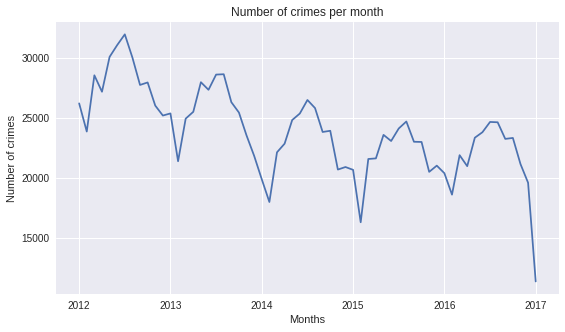

In [0]:
df.Date = pd.to_datetime(df.Date, format='%m/%d/%Y %I:%M:%S %p')
df.index = pd.DatetimeIndex(df.Date)
plt.figure(figsize=(9,5))
df.resample('M').size().plot(legend=False)
plt.title('Number of crimes over the years')
plt.xlabel('Years')
plt.ylabel('Number of crimes')
plt.show()

## Fixed Kind of pattern over time-stamp

**Comment**

From above graph we can see a fix kind-of pattern over a year duration also crime count is decrease over the duraiton form 12 to 2017 and  can see crime is at max during the mid of the year.

The crime is decraseing over time.

### Let's look crime over time (with rolling the days)

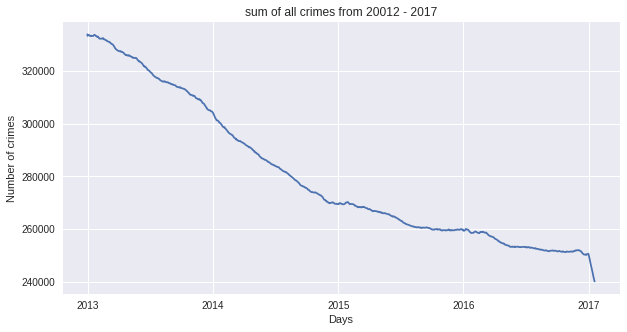

In [0]:
plt.figure(figsize=(10,5))
df.resample('D').size().rolling(365).sum().plot()
plt.title('sum of all crimes from 20012 - 2017')
plt.ylabel('Number of crimes')
plt.xlabel('Days')
plt.show()

**Comment**

From above rolling sum graph we can conclude that crime rate is decrease from 2013 to 2016 and 2016-2017 have around equal crime.

### **Let's understand categories of crime and its differnt prespective**

Unique feature checking for process data

In [0]:
df.nunique()

Date                    486306
Block                    32080
Primary Type                33
Description                337
Location Description       111
Arrest                       2
Domestic                     2
Beat                       302
District                    24
Ward                        50
Community Area              78
FBI Code                    26
X Coordinate             66634
Y Coordinate            109105
Year                         5
dtype: int64

### ** Let's check most common categories of crime**

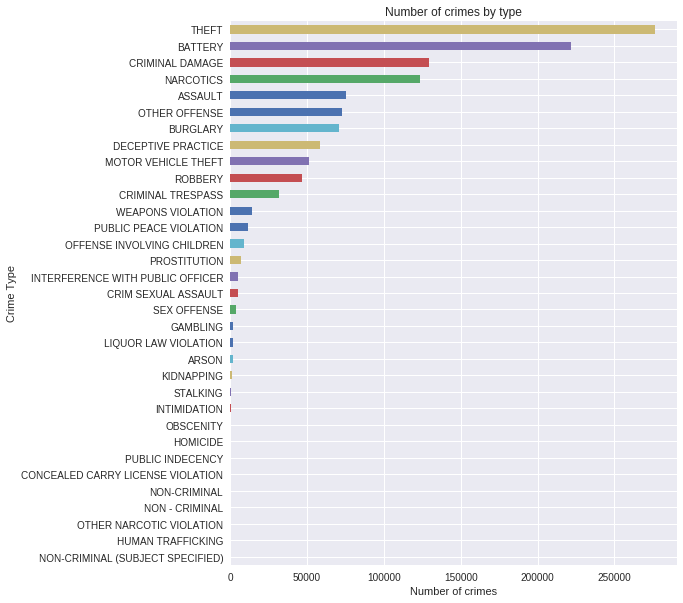

In [0]:
plt.figure(figsize=(8,10))
df['Primary Type'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by type')
plt.ylabel('Crime Type')
plt.xlabel('Number of crimes')
plt.show()

**Comment**

Theft , Battery, Narcotics are most popular kind of crime.

## **Crime statistics by location**

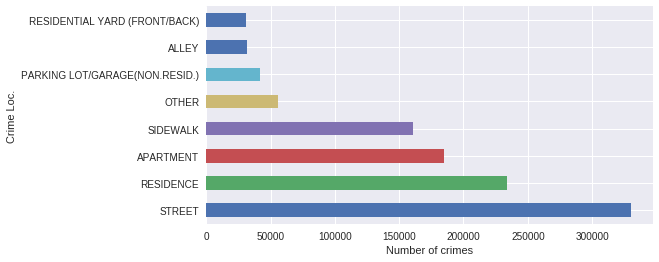

In [0]:
plt.figure(figsize=(8,4))
df['Location Description'].value_counts().head(8).plot(kind='barh')
plt.ylabel('Crime Loc.')
plt.xlabel('Number of crimes')
plt.show()


**Comment-**

most crime are happened at **street, Resindence or can say at private places. **

**Better understand type of crime with location form heat map visulization**

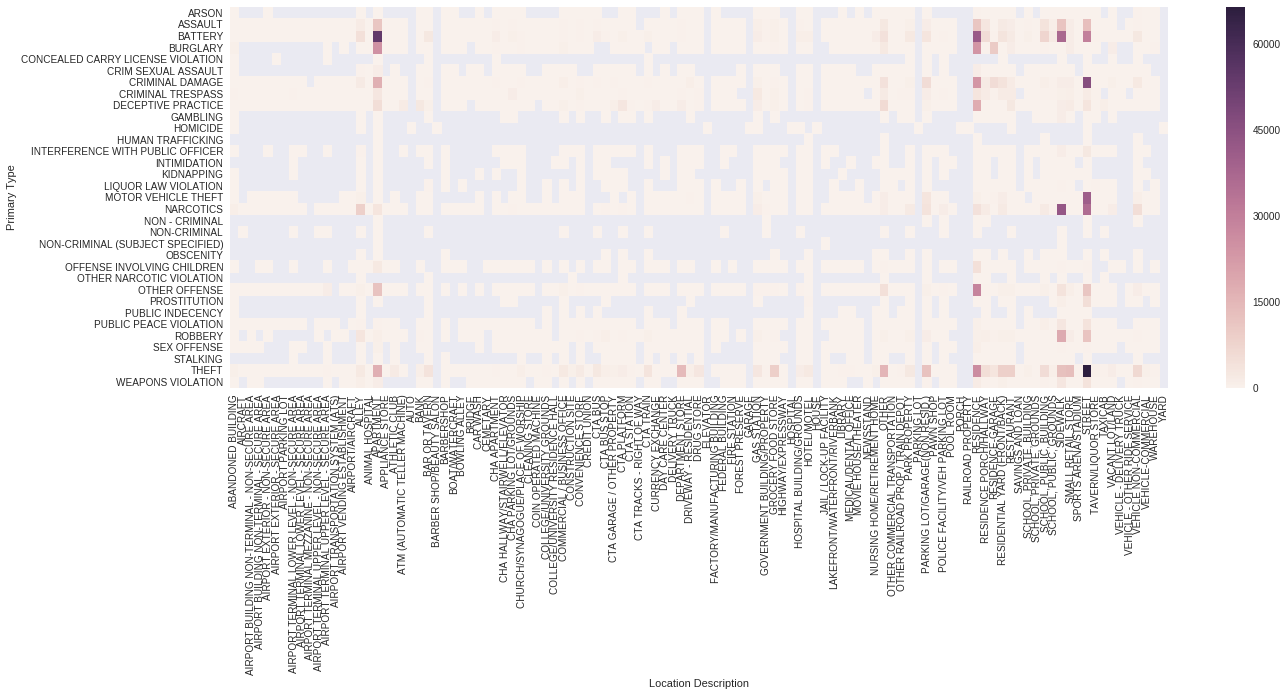

In [0]:
crime_area = pd.DataFrame(df.groupby(['Primary Type', 'Location Description']).size().sort_values(ascending=False).rename('Cnt').reset_index())
#topk = df.groupby(['Primary Type', 'Location Description']).size().reset_index(name='counts').groupby('Primary Type').apply(lambda x: x.sort_values('counts',ascending=False).head(3))
d;lfpivotdf = crime_area.pivot(index='Primary Type', columns='Location Description', values='Cnt')
plt.figure(figsize=(21,7))
sns.heatmap(pivotdf)

**Comment**

We can see for Location  like Street and Sidewalk. It makes sense that Theft, Narcotics, Motor Vehicle theft and Battery mostly happened in the streets.

At Residence we see Theft, Burglary, Deceptive Practise and Criminal Damage which are expected. But we also see Assault and Battery.


**Understand the crime by month duration**

   month  Year    Cnt
0      7  2012  31945
1      6  2012  31052
2      5  2012  30067
3      8  2012  30010
4      8  2013  28622


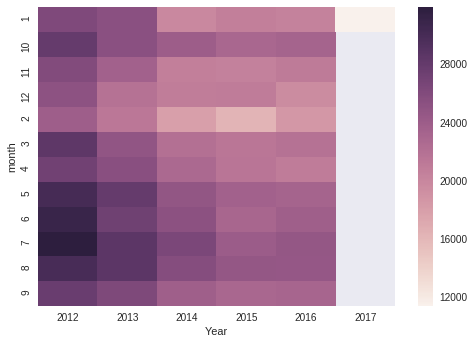

In [0]:
from datetime import datetime
df['month']=df.index.month
crime = pd.DataFrame(df.groupby(['month','Year']).size().sort_values(ascending=False).rename('Cnt').reset_index())
print(crime.head())
crime['month']=crime['month'].astype(str)
crime1 = crime.pivot_table(values='Cnt',index='month',columns='Year')
sns.heatmap(crime1)

**Comment**

Mid of the Year >>June and July ( 6th , 7th and 8th) months have the **highest crime rate **over the years and can also see that crime rate is descreasing from 2012 to 2017 as color of heatmap is getting lighter.

### Let's understand different ( Top) crime type-

In [0]:
df_theft = df[df['Primary Type'] == "THEFT"]
df_battery = df[df['Primary Type'] == "BATTERY"]


Bar plot to understand the sub-categories of Theft

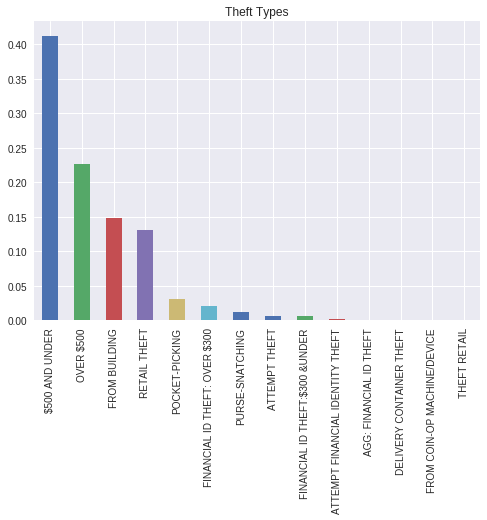

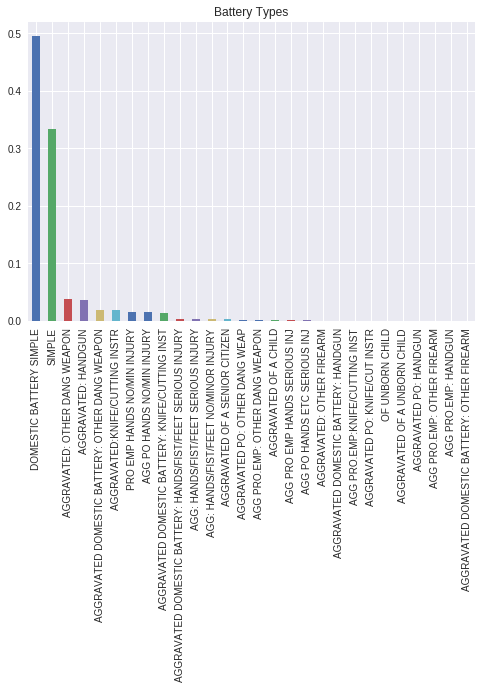

In [0]:
df_theft['Description'].value_counts(normalize=True).plot.bar()
plt.title("Theft Types")
plt.show()

df_battery['Description'].value_counts(normalize=True).plot.bar()
plt.title("Battery Types")
plt.show()

**Comment**

Theft crime register most for money with small amount. 

Domestic Battery is the most common Battery practice

## **Geographic distribution of crime **

**First plot the district wise different location mentioned in dataset **

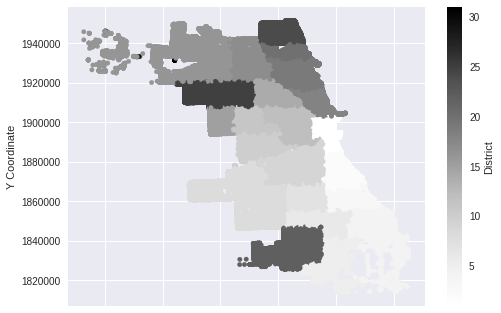

In [0]:
df=df[df['Y Coordinate']>0]
df.plot(kind='scatter',x='X Coordinate', y='Y Coordinate', c='District')

**Comment**

All districts have a number of crimes associated with them

### Let's check Relative Crime rate among district

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


<Figure size 576x576 with 0 Axes>

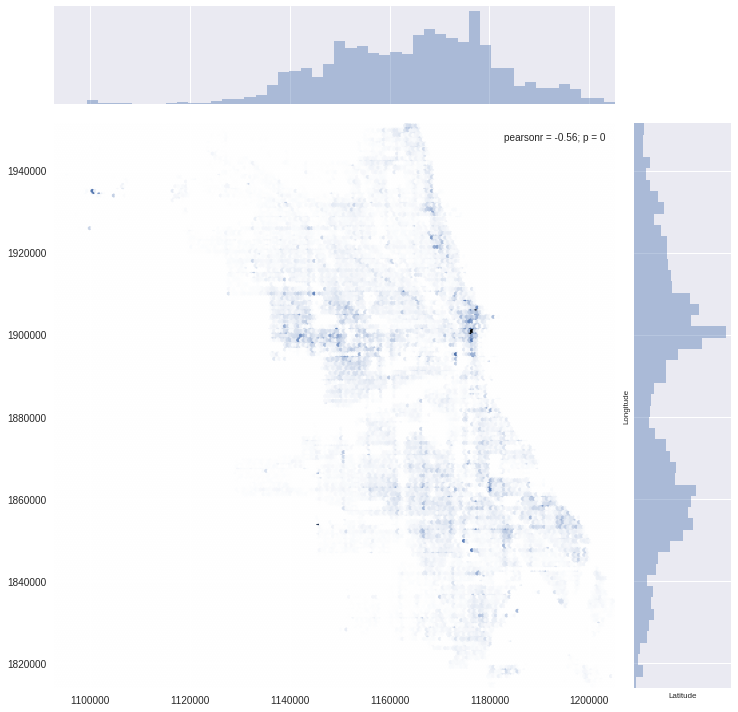

In [0]:
plt.figure(figsize=(8,8))
sns.jointplot(x=df['X Coordinate'].values, y=df['Y Coordinate'].values, size=10, kind='hex')
plt.ylabel('Longitude', fontsize=8)
plt.xlabel('Latitude', fontsize=8)
plt.show()

**Comment**

We can see that North-West region of chicago has offence recorded than other area

on y axis two kind of cluster creating on N-E and S-E Areas.

**Let's understand Arrest rate**

<Figure size 864x864 with 0 Axes>

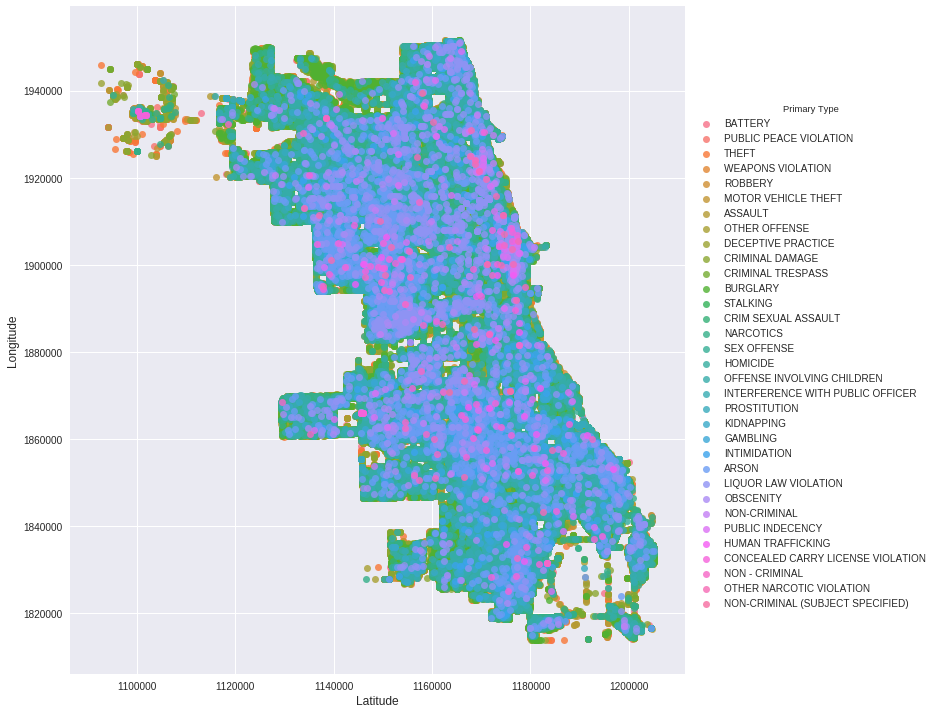

In [0]:
plt.figure(figsize=(12,12))
sns.lmplot(x='X Coordinate', y='Y Coordinate', size=10, hue='Primary Type', data=df, fit_reg=False)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

**Comment**

From Geo-plot we are unable to see a specific crime location wise. different crime type are spreaded randomly.

### Arrest Percentage

<Figure size 360x288 with 0 Axes>

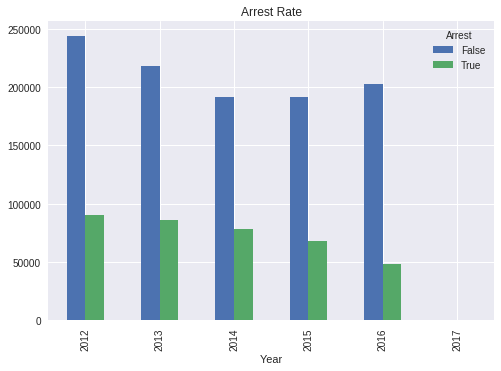

In [0]:
plt.figure(figsize=(5,4))
df.groupby(['Year','Arrest'])['Domestic'].count().unstack().plot.bar()
plt.title("Arrest Rate")
plt.show()

**Comment**

We can see out of total crime only around 0.28 percent arrest done others either be warned as per the severity of the crime.

over the 5 year arrest percenatage is almost constant.

## Predictive Use Cases of the dataset

**Future Crime prediction **

**Geographically crime type division and forcasting so necessary action can be taken. **

**Minimization primary type of crime by visulizing root cause and accordingly action items**

### Future Crime Prediction

we have seen earlier a fixed kind of pattern of crime over time duration so we can use time series model further forcasting

by using ARIMA or Prophet model

**ARIMA or Prophet** >>Model work where non-linear trends are fit with yearly, weekly, and daily seasonality. these work best with time series that have strong seasonal effects and several seasons of historical data. 

We can implement above data-set with checking **seasonality, ACF and PACF value** and fit the model over the data.

Due to some time constraints and occupied by other office activity i am leaving that part.if further  predictive forcasting required please let me know.

## Thanks

In [0]:
def create_day_series(df1):
    
    
    day_df = pd.Series(df1.groupby(['Date']).size())
    # setting Date/Time as index
    day_df.index = pd.DatetimeIndex(day_df.index)
    # Resampling to daily trips
    day_df = day_df.resample('1D').apply(np.sum)
    
    return day_df

df_day = create_day_series(df)
df_day.head()

In [0]:
def initial_plots(time_series, num_lag):

 
    plt.figure(1)
    plt.plot(time_series)
    plt.title('Original data across time')
    plt.figure(2)
    plot_acf(time_series, lags = num_lag)
    plt.title('Autocorrelation plot')
    plot_pacf(time_series, lags = num_lag)
    plt.title('Partial autocorrelation plot')
    
    plt.show()
    
initial_plots(day_df_2014, 45)